In [1]:
import os
import numpy as np
from save_model_metadata import save_model_metadata
from load_annotation_data import load_annotation_data
from create_training_tiles import create_training_tiles
from train_segmentation_model import train_segmentation_model
from classify_images import classify_images
from test_segmentation_model import test_segmentation_model


In [2]:
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver'
pthim = os.path.join(pth, '10x')
umpix = 1
pthtest = os.path.join(pth, 'testing image')
pthtestim = os.path.join(pthtest, '10x')
nm = 'CODA_python_08_30_2024'

WS = [[0, 0, 0, 0, 2, 0, 2], [7, 6], 
      [1, 2, 3, 4, 5, 6, 7], 
      [6, 4, 2, 3, 5, 1,7], []]
numclass = max(WS[2])
sxy = 1024
pthDL = os.path.join(pth, nm)
nblack = numclass + 1
nwhite = WS[1][0]
cmap = np.array([[230, 190, 100],
                  [65, 155, 210],
                  [145, 35, 35],
                  [158, 24, 118],
                  [30, 50, 50],
                  [235, 188, 215],
                  [255, 255, 255]])
classNames = ['PDAC', 'bile duct', 'vasculature', 'hepatocyte','immune','stroma','whitespace']
classCheck = []
ntrain = 15
nvalidate = np.ceil(ntrain/5)
numims = 2

Saving model metadata and classification colormap...
Net file already exists, updating data...
Plotting cmap took 0.0 minutes and 0.015214920043945312 seconds
Saving metadata took 0.0 minutes and 0.07294893264770508 seconds


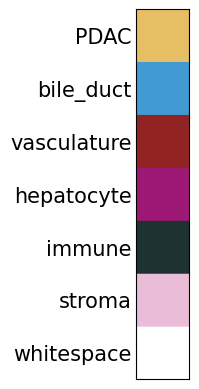

In [3]:
save_model_metadata(pthDL, pthim, WS, nm, umpix, cmap, sxy, classNames, ntrain, nvalidate) 

In [4]:
from WSI2png import WSI2png
resolution = '10x'
umpix = 1
WSI2png(pth, resolution, umpix)

In [5]:
[ctlist0, numann0] = load_annotation_data(pthDL, pth, pthim, classCheck)

 
Importing annotation data...
Image 1 of 6: Liv-17_0001
Checking parameters took 0.0 minutes and 0.03565573692321777 seconds
 annotation data previously loaded
Image 2 of 6: Liv-17_0041
Checking parameters took 0.0 minutes and 0.02161097526550293 seconds
 annotation data previously loaded
Image 3 of 6: Liv-17_0081
Checking parameters took 0.0 minutes and 0.023242473602294922 seconds
 annotation data previously loaded
Image 4 of 6: Liv-17_0121
Checking parameters took 0.0 minutes and 0.025275230407714844 seconds
 annotation data previously loaded
Image 5 of 6: Liv-17_0161
Checking parameters took 0.0 minutes and 0.02754974365234375 seconds
 annotation data previously loaded
Image 6 of 6: Liv-17_0199
Checking parameters took 0.0 minutes and 0.0283963680267334 seconds
 annotation data previously loaded


In [6]:
create_training_tiles(pthDL, numann0, ctlist0)


Calculating total number of pixels in the training dataset...
 There are 544424200.0 pixels of PDAC, 41% of the most common class.
 There are 32228400.0 pixels of bile duct, 2% of the most common class.
 There are 92477300.0 pixels of vasculature, 7% of the most common class.
 There are 1301979000.0 pixels of hepatocyte. This is the most common class.
 There are 33182000.0 pixels of immune, 2% of the most common class.
 There are 667514800.0 pixels of stroma, 51% of the most common class.
 There are 817693100.0 pixels of whitespace, 62% of the most common class.

Building training tiles...
  Already done.
  Elapsed time to create training big tiles: 0.0h 0.0m 0.007165431976318359s


Building validation tiles...
Already done.
Elapsed time to create validation big tiles: 0.0h 0.0m 0.0029892921447753906s


TensorFlow is using the following GPU: LogicalDevice(name='/device:GPU:0', device_type='GPU')
Starting model training...
Epoch 1/8
500/500 [==============================] - 310s 547ms/step - loss: 0.3080 - accuracy: 0.8910 - val_loss: 0.8256 - val_accuracy: 0.7478
Epoch 2/8
500/500 [==============================] - 264s 527ms/step - loss: 0.1591 - accuracy: 0.9399 - val_loss: 0.1588 - val_accuracy: 0.9417
Epoch 3/8
500/500 [==============================] - 272s 545ms/step - loss: 0.1210 - accuracy: 0.9536 - val_loss: 0.1170 - val_accuracy: 0.9554
Epoch 4/8
500/500 [==============================] - 255s 510ms/step - loss: 0.0969 - accuracy: 0.9624 - val_loss: 0.1047 - val_accuracy: 0.9600
Epoch 5/8
500/500 [==============================] - 298s 597ms/step - loss: 0.0792 - accuracy: 0.9688 - val_loss: 0.0928 - val_accuracy: 0.9647
Epoch 6/8
500/500 [==============================] - 282s 565ms/step - loss: 0.0679 - accuracy: 0.9731 - val_loss: 0.0900 - val_accuracy: 0.9662
Epoch 7/8

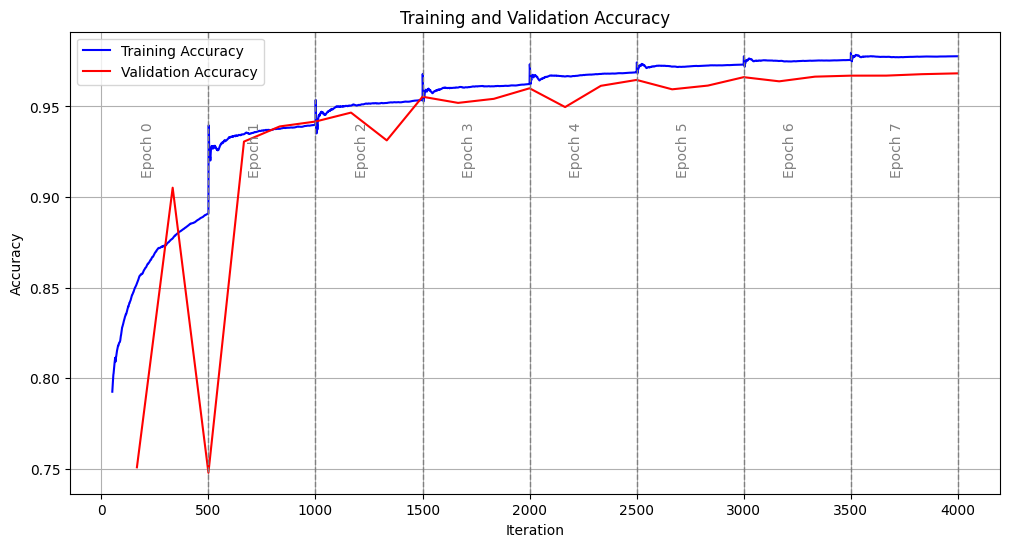

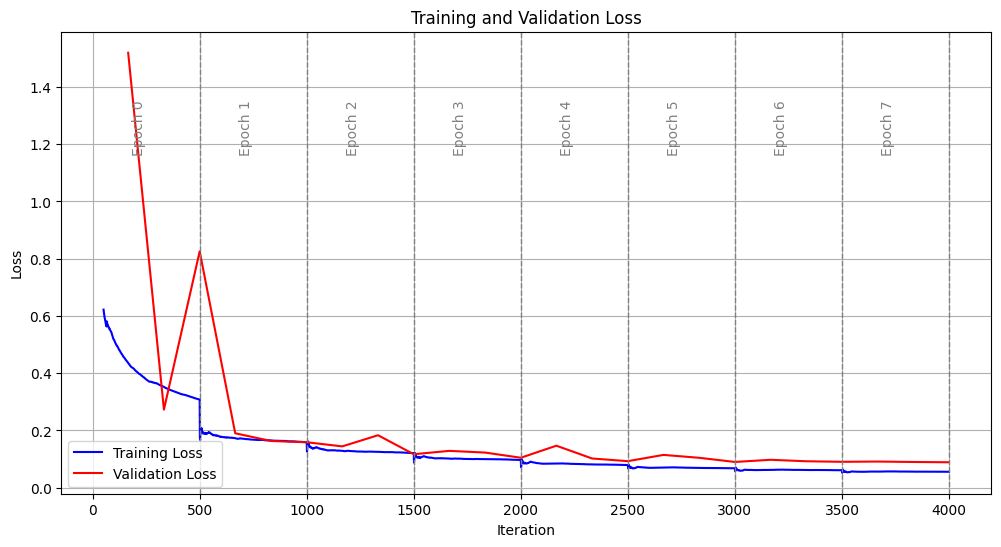

In [7]:
train_segmentation_model(pthDL, fine_tune=False)

Testing segmentation model......
 
Importing annotation data...
Image 1 of 1: Liv-17_0101
Checking parameters took 0.0 minutes and 0.021927356719970703 seconds
 annotation data previously loaded
   
  Starting classification of image 1 of 1: Liv-17_0101.tif
  Image Liv-17_0101.tif already classified by this model
  Total time for classification: 0.0h 0.0m 4.221036672592163s

Calculating total number of pixels in the testing dataset...
  There are 351089 pixels of PDAC, 31% of the most common class.
  There are 22457 pixels of bile duct, 1% of the most common class.
  There are 19768 pixels of vasculature, 1% of the most common class.
  There are 1127956 pixels of hepatocyte. This is the most common class.
  There are 14449 pixels of immune, 1% of the most common class.
  There are 310839 pixels of stroma, 27% of the most common class.
  There are 809971 pixels of whitespace, 71% of the most common class.

  Only 14449 testing pixels of immune found.
    We suggest a minimum of 15,000 p

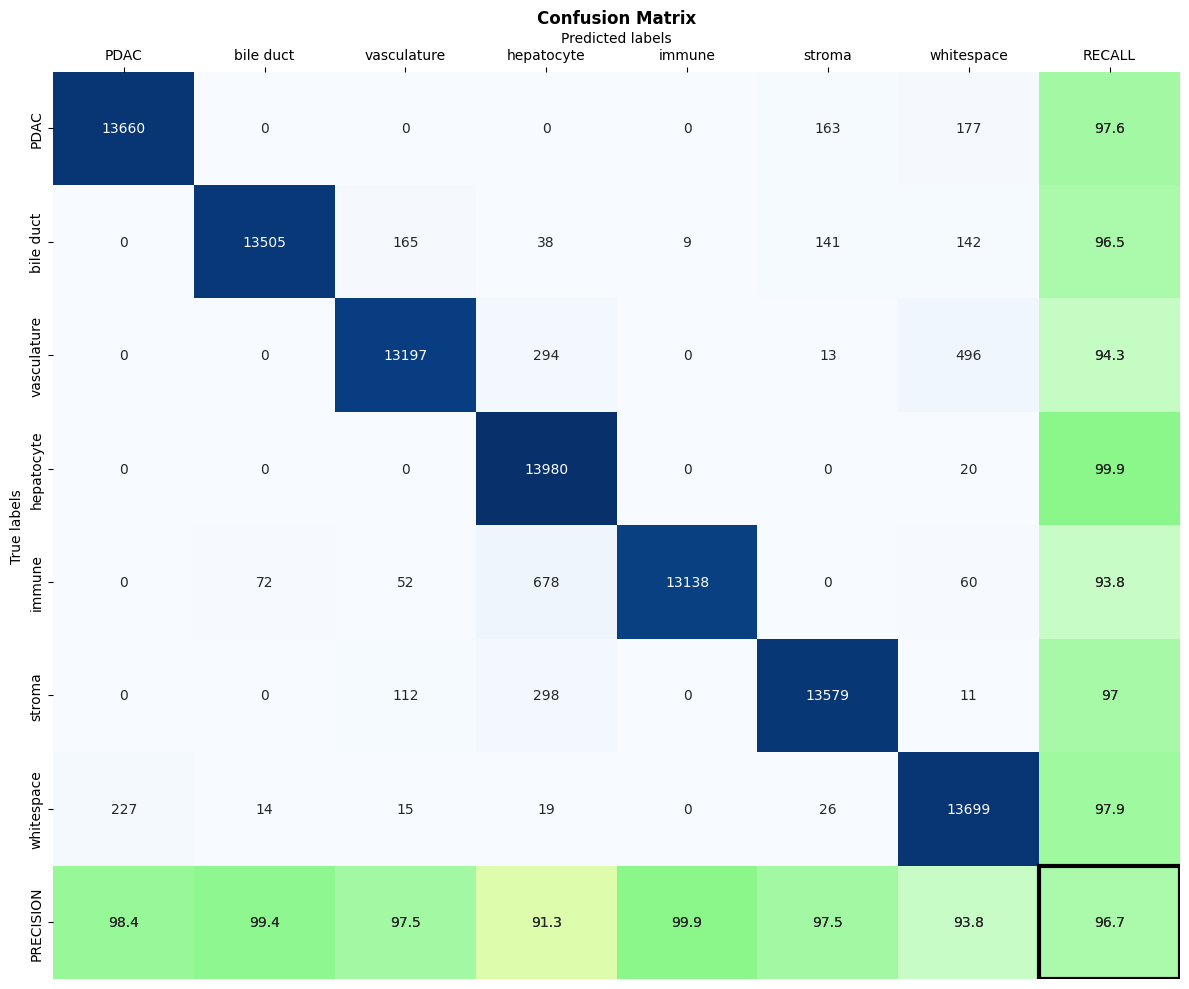


Confusion matrix saved to \\10.99.68.52\Kiemendata\Valentina Matos\tissues for methods paper\human liver\CODA_python_08_30_2024\confusion_matrix.jpg

Overall Accuracy: 96.7%


In [3]:
test_segmentation_model(pthDL, pthtest, pthtestim)

   
  Starting classification of image 1 of 6: Liv-17_0001.tif
1/1 [==============================] - 0s 18ms/step
Image 1 of 6 took 153 s
  Starting classification of image 2 of 6: Liv-17_0041.tif
1/1 [==============================] - 0s 17ms/step
Image 2 of 6 took 451 s
  Starting classification of image 3 of 6: Liv-17_0081.tif
1/1 [==============================] - 0s 19ms/step
Image 3 of 6 took 848 s
  Starting classification of image 4 of 6: Liv-17_0121.tif
1/1 [==============================] - 0s 17ms/step
Image 4 of 6 took 1212 s
  Starting classification of image 5 of 6: Liv-17_0161.tif
1/1 [==============================] - 0s 22ms/step
Image 5 of 6 took 1684 s
  Starting classification of image 6 of 6: Liv-17_0199.tif
1/1 [==============================] - 0s 21ms/step
Image 6 of 6 took 2095 s
  Total time for classification: 0.0h 38.0m 48.707430601119995s


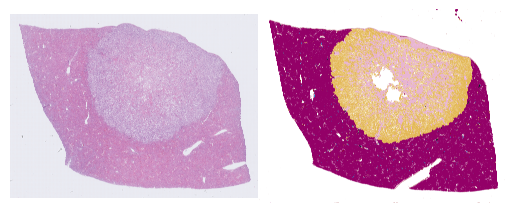

'\\\\10.99.68.52\\Kiemendata\\Valentina Matos\\tissues for methods paper\\human liver\\10x\\classification_CODA_python_08_30_2024'

In [9]:
classify_images(pthim,pthDL, color_overlay_HE=True)